<a href="https://colab.research.google.com/github/moonkisung/DL-from-scratch-tutorial/blob/main/Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 817 (delta 11), reused 0 (delta 0), pack-reused 791
Receiving objects: 100% (817/817), 52.21 MiB | 42.53 MiB/s, done.
Resolving deltas: 100% (468/468), done.


In [ ]:
import numpy as np

#3.1 Perceptron to Neural Network

#3.2 Activation Function

## 3.2.1 Sigmoid Function

## 3.2.2 Implementing Step Function

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
y = y.astype(np.int)
y

array([0, 1, 1])

## 3.2.3 Step Function Graph

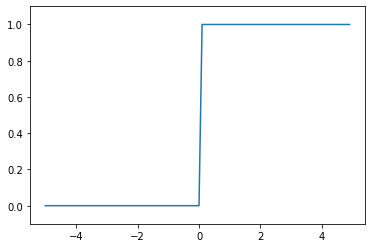

In [ ]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

## 3.2.4 Implementing Sigmoid Function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

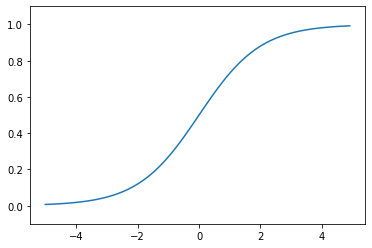

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

# 3.3 Multidimensional array calculation

## 3.3.1 Multidimension

In [ ]:
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

## 3.3.2 Matrix Product

In [ ]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [ ]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [ ]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [ ]:
B = np.array([7,8])
B.shape

(2,)

In [ ]:
np.dot(A, B)

array([23, 53, 83])

## 3.3.3 Matrix Product in Neural Network

In [ ]:
X = np.array([1, 2])
X.shape

(2,)

In [ ]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


#3.4 Implementing a 3-layer Neural Network

## 3.4.1 Notation Explanation

## 3.4.2 Implementing Signal Transfer on each layer

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [ ]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


## 3.4.3 Implementation Arrange

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#3.5 Design the Output Layer

## 3.5.1 Implementing Identity Function and Softmax Function

In [ ]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [ ]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.2 Cautions for Implementing Softmax Function

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3 Features of the Softmax Function

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
np.sum(y)

1.0

## 3.5.6 Determining the Number of neurons in the Output Layer

# 3.6 Handwriting number recognition

## 3.6.1 MNIST Dataset

In [ ]:
%cd /content/deep-learning-from-scratch/ch03

/content/deep-learning-from-scratch/ch03


In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
# print(img)
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [ ]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 3.6.3 Batch Processing

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# 3.7 Arrangement

In [ ]:
%cd /content/deep-learning-from-scratch/ch03

/content/deep-learning-from-scratch/ch03


In [ ]:
%ls

mnist_show.py             README.md          sigmoid.py
neuralnet_mnist_batch.py  relu.py            sig_step_compare.py
neuralnet_mnist.py        sample_weight.pkl  step_function.py


In [ ]:
!pwd

/content/deep-learning-from-scratch/ch03
